$$
\text{COMP5930M Scientific Computation - Coursework 1}
$$

$$
\text{Author: James Baxter Chapman}
$$
$$
\text{Date: 18th November 2024}
$$



**Exercise 1**: We wish to solve numerically the nonlinear equation
$$
f(x) = \exp(-x^3)\sin(x)+x^2 -x = 0 \tag{1}
$$
(a) Identify the approximate solutions $x^*$ s.t $f(x^*)=0$ that this equation has in the interval $[-1.1]$. Use e.g. graphical analysis. 
**[2 Marks]**

Graphical analysis is when you plot the function within specified bounds and visually determine when the function is equal to 0, a.k.a when it crosses the x-axis. The plot for the nonlinear function can be seen below:

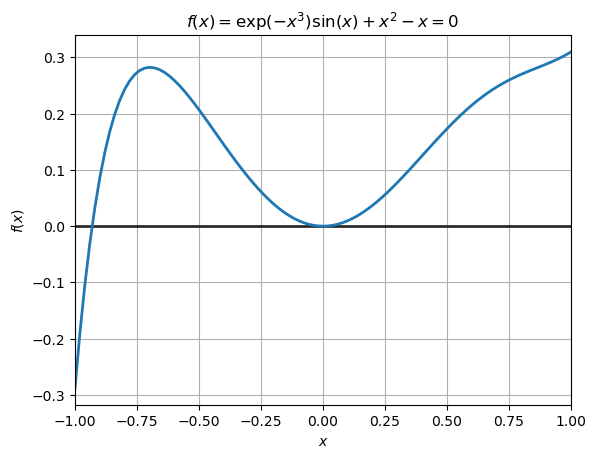

In [46]:
import numpy as np 
import matplotlib.pyplot as plt

def function(x):
    power = - x **3
    return (np.e ** power) * np.sin(x) + x**2 - x

x = np.linspace(-1,1,101)
zeros = np.zeros(len(x))
plt.plot(x, zeros, color='black', lw=2, alpha=0.8)
plt.plot(x, function(x), lw=2)
plt.xlim(-1,1)
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.title(r'$f(x) = \exp(-x^3)\sin(x) + x^2 - x = 0$')
plt.grid()

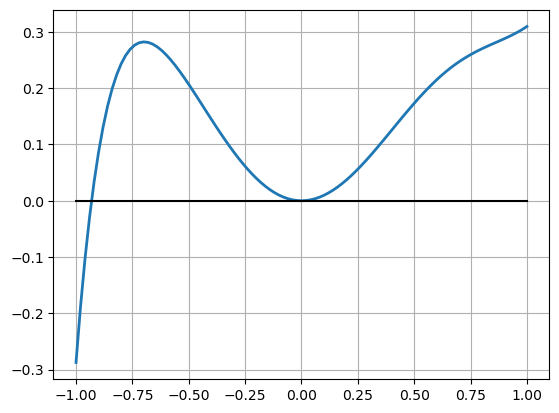

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# Define the functions
def function(x):
    power = - x ** 3
    return (np.e ** power) * np.sin(x) + x ** 2 - x

def dfunction(x):
    power = - x ** 3
    return (np.e ** power) * (np.cos(x) - 3 * x ** 2) + 2 * x - 1

# Generate data
x = np.linspace(-1, 1, 101)
zeros = np.zeros(len(x))

# Create the plot
fig, ax = plt.subplots()
ax.plot(x, function(x), lw=2)
ax.plot(x, zeros, color='black')
# ax.plot(x, dfunction(x)) # Uncomment if you need to plot dfunction(x)
ax.grid()

# Display plot in centered HTML wrapper
display(HTML("<div style='text-align: center;'>"))
plt.show()
display(HTML("</div>"))

In [26]:
def myNewton(fnon, dfdx, x0, tol, maxk, *fnonargs):
    # fnon     - name of the nonlinear function f(x)
    # dfdx     - name of the derivative function df(x)
    # x0       - initial guess for the solution x0
    # tol      - stopping tolerance for Newton's iteration
    # maxk     - maximum number of Newton iterations before stopping
    # fnonargs - optional arguments that will be passed to the nonlinear function (useful for additional function parameters)
    k = 0
    x = x0
    f = eval(fnon)(x,*fnonargs)

    print(' k  xk           f(xk)')

    # Main Newton loop
    while (abs(f) > tol and k < maxk):
        # Evaluate function derivative
        d = eval(dfdx)(x,*fnonargs)

        # Take Newton step
        x = x - f/d
        f = eval(fnon)(x,*fnonargs)
        k += 1
        print('{0:2.0f}  {1:2.8f}  {2:2.2e}'.format(k, x, abs(f)))

    if (k == maxk):
        print('Not converged')
    else:
        print('Converged')

In [27]:
myNewton('function', 'dfunction', -0.95, 1e-6, 100)


 k  xk           f(xk)
 1  -0.95817805  9.56e-02
 2  -0.96988189  1.43e-01
 3  -0.98663180  2.19e-01
 4  -1.01058447  3.46e-01
 5  -1.04474190  5.69e-01
 6  -1.09309390  9.90e-01
 7  -1.16037245  1.87e+00
 8  -1.25063764  3.90e+00
 9  -1.36375091  9.14e+00
10  -1.49137198  2.38e+01
11  -1.61932911  6.55e+01
12  -1.73694526  1.81e+02
13  -1.84095363  4.89e+02
14  -1.93225794  1.27e+03
15  -2.01282588  3.14e+03
16  -2.08451770  7.47e+03
17  -2.14884312  1.71e+04
18  -2.20698508  3.75e+04
19  -2.25987095  7.94e+04
20  -2.30823634  1.62e+05
21  -2.35267347  3.21e+05
22  -2.39366603  6.15e+05
23  -2.43161439  1.14e+06
24  -2.46685393  2.07e+06
25  -2.49966853  3.63e+06
26  -2.53030073  6.23e+06
27  -2.55895948  1.04e+07
28  -2.58582610  1.70e+07
29  -2.61105900  2.72e+07
30  -2.63479738  4.26e+07
31  -2.65716421  6.54e+07
32  -2.67826871  9.86e+07
33  -2.69820827  1.46e+08
34  -2.71707010  2.12e+08
35  -2.73493263  3.03e+08
36  -2.75186660  4.27e+08
37  -2.76793604  5.92e+08
38  -2.78319910

In [28]:
def bisection(fnon, xL, xR, tol, maxk, *fnonargs):
    # fnon     - name of the nonlinear function f(x)
    # xL,xR    - initial bracket [xL,xR]
    # tol      - stopping tolerance for Newton's iteration
    # maxk     - maximum number of Newton iterations before stopping
    # fnonargs - optional arguments that will be passed to the nonlinear function (useful for additional function parameters)

    k = 0
    iterates = []

    print(' k  xk          f(xk)')

    # Main bisection loop
    while ((xR - xL) > tol and k < maxk):
        xC = (xL + xR) / 2
        iterates.append(xC)

        fL = eval(fnon)(xL,*fnonargs)
        fR = eval(fnon)(xR,*fnonargs)
        fC = eval(fnon)(xC,*fnonargs)

        if (abs(fC) < tol):
            break
        elif (fL * fC < 0):
            xR = xC
            fR = fC
        else:
            xL = xC
            fL = fC

        k += 1
        print('{0:2.0f}  {1:2.8f}  {2:2.2e}'.format(k, xC, abs(fC)))

    if (k == maxk):
        print('Not converged')
    else:
        print('Converged')

    return iterates

In [29]:
bisection('function', -1, 0.5, 1e-6, 100)

 k  xk          f(xk)
 1  -0.25000000  6.12e-02
 2  -0.62500000  2.69e-01
 3  -0.81250000  2.31e-01
 4  -0.90625000  7.05e-02
 5  -0.95312500  7.63e-02
 6  -0.92968750  4.05e-03
 7  -0.94140625  3.43e-02
 8  -0.93554688  1.47e-02
 9  -0.93261719  5.19e-03
10  -0.93115234  5.47e-04
11  -0.93041992  1.76e-03
12  -0.93078613  6.07e-04
13  -0.93096924  3.07e-05
14  -0.93106079  2.58e-04
15  -0.93101501  1.14e-04
16  -0.93099213  4.14e-05
17  -0.93098068  5.33e-06
18  -0.93097496  1.27e-05
19  -0.93097782  3.68e-06
Converged


[-0.25,
 -0.625,
 -0.8125,
 -0.90625,
 -0.953125,
 -0.9296875,
 -0.94140625,
 -0.935546875,
 -0.9326171875,
 -0.93115234375,
 -0.930419921875,
 -0.9307861328125,
 -0.93096923828125,
 -0.931060791015625,
 -0.9310150146484375,
 -0.9309921264648438,
 -0.9309806823730469,
 -0.9309749603271484,
 -0.9309778213500977,
 -0.9309792518615723]

In [ ]:
def dekker(fnon, a, b, tol, maxit, *fnonargs):
    """
    Dekker's Method. Author: James Baxter Chapman

    Parameters
    ----------
    fnon : function
           Name of the nonlinear function f(x)
    a : float      
           contrapoint to ensure f(a) and f(b) return solutions with opposite signs.
    b : float       
           Initial guess of the root of fnon.
    tol : float    
           stopping tolerance for Dekker's iterations.
    maxk : int
           maximum number of Dekker iterations before stopping.
    fnonargs: object
           optional arguments that will be passed to the nonlinear function (useful for additional function parameters).

    Returns
    -------
    Function values and tolerances at each iteration.
    """
    f_a = eval(fnon)(a, *fnonargs)
    f_b = eval(fnon)(b, *fnonargs)

    assert f_a*f_b < 0, "f(a)f(b) must be less than or equal to 0, please change [a,b] to satisfy this"
    assert f_b < f_a, "f(b) must be less than f(a), please flip them around!"

    bk = b
    ak = a 
    k = 0
    print(' k  xk          f(xk)')
    # Main Dekker's loop 
    while (abs(f_b) > tol and k < maxit):
       # First iteration
       if k == 0:
           
              s = bk - (bk - ak)/((eval(fnon)(bk, *fnonargs) - (eval(fnon(ak, *fnonargs)))))*eval(fnon)(bk, *fnonargs)
              m = (ak + bk)/2
              
              result = eval(fnon)(bk, *fnonargs)

              if eval(fnon)(bk, *fnonargs) < result < eval(fnon)(m, *fnonargs) or eval(fnon)(m, *fnonargs) < result < eval(fnon)(bk, *fnonargs):
                   bk1 = s
              else:
                   bk1 = m

              if eval(fnon)(bk1, *fnonargs) > 0:
                   a


       # All other iterations

# Question 2
------------

Plot the isocontour of the system

<>:22: SyntaxWarning: invalid escape sequence '\p'
<>:22: SyntaxWarning: invalid escape sequence '\p'
/var/folders/53/rgjxmmln1nsd358smgzc_x8m0000gn/T/ipykernel_13126/2761838110.py:22: SyntaxWarning: invalid escape sequence '\p'
  plt.title('Isocontours of $ \phi (x) = ||F(x)||^2$')
/var/folders/53/rgjxmmln1nsd358smgzc_x8m0000gn/T/ipykernel_13126/2761838110.py:16: UserWarning: The following kwargs were not used by contour: 'linewidth'
  C = plt.contour(X, Y, func(X,Y), levels=levels, colors='black', linewidth=.5)


Text(0.5, 1.0, 'Isocontours of $ \\phi (x) = ||F(x)||^2$')

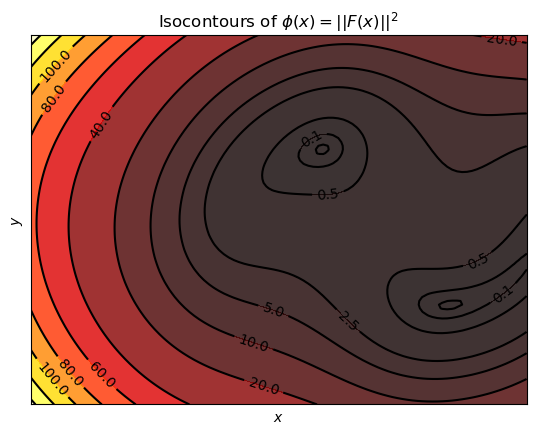

In [143]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-2,2,101)
y = np.linspace(-2,2,101)

X, Y = np.meshgrid(x, y)

def func(X,Y):
    return ((X-1)**2 + Y**2 - 1)**2 + (np.cos(2*X) - Y)**2

levels = [0,0.01,0.1,0.5,2.5,5,10,20,40,60,80,100,120,140,160]

plt.contourf(X, Y, func(X, Y), levels=levels, alpha=0.8, cmap=plt.cm.hot)

C = plt.contour(X, Y, func(X,Y), levels=levels, colors='black', linewidth=.5)
plt.clabel(C, inline=1, fontsize=10)
plt.xticks(())
plt.yticks(())
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Isocontours of $ \phi (x) = ||F(x)||^2$')




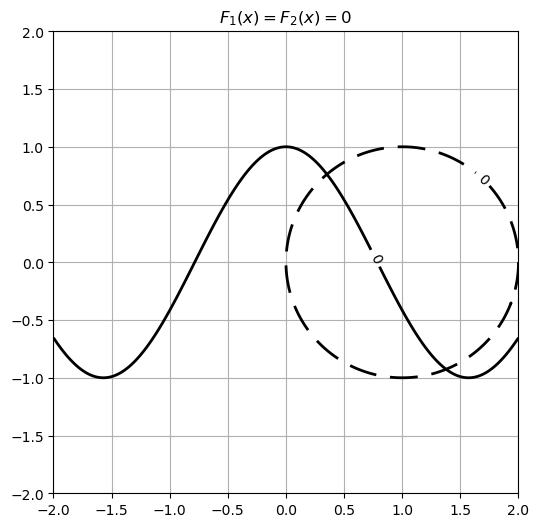

In [ ]:
# A company manufacturers two machines, A and B. Using available resources, either 28 A
# or 14 B can be manufactured daily. The sales department can sell up to 14 A machines
# or 24 B machines. The shipping facility can handle no more than 16 machines per day.
# The company makes a profit of £400 on each A machine and £600 on each B machine.
# How many A and B machines should the company manufacture every day to maximise profit?

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import patheffects
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(6, 6))


xvec = np.linspace(-2,2,251)
yvec = np.linspace(-2,2,251)

x1, x2 = np.meshgrid(xvec, yvec)

F1 = (x1 - 1)**2 + x2**2 - 1
F2 = np.cos(2*x1) - x2
linewidth = 1.2

Profit = ax.contour(x1, x2, F1, colors='black', levels=[0], linewidths=2)
loss = ax.contour(x1, x2, F2, colors='black', levels=[0], linewidths=2)
Profit.set_dashes([(0, (10.0, 5.0))])
ax.clabel(Profit, use_clabeltext=True)
ax.clabel(loss, use_clabeltext=True)

ax.set_xlim(-2, 2)
ax.set_ylim(-2,2)
plt.title('$F_1(x) = F_2(x) = 0$')
plt.grid()
plt.show()

<>:36: SyntaxWarning: invalid escape sequence '\p'
<>:36: SyntaxWarning: invalid escape sequence '\p'
/var/folders/53/rgjxmmln1nsd358smgzc_x8m0000gn/T/ipykernel_22845/3800002284.py:36: SyntaxWarning: invalid escape sequence '\p'
  plt.title('Isocontours of $ \phi (x) = ||F(x)||^2$' + ' & $F_1(x) = F_2(x)$')
/var/folders/53/rgjxmmln1nsd358smgzc_x8m0000gn/T/ipykernel_22845/3800002284.py:27: UserWarning: The following kwargs were not used by contour: 'linewidth'
  C = plt.contour(X, Y, func(X,Y), levels=levels, colors='black', linewidth=0.5, alpha=0.6)


Text(0.5, 1.0, 'Isocontours of $ \\phi (x) = ||F(x)||^2$ & $F_1(x) = F_2(x)$')

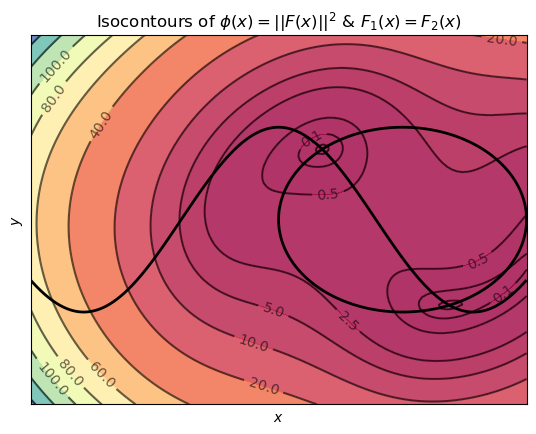

In [248]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-2,2,101)
y = np.linspace(-2,2,101)

X, Y = np.meshgrid(x, y)

def func(X,Y):
    return ((X-1)**2 + Y**2 - 1)**2 + (np.cos(2*X) - Y)**2

levels = [0,0.01,0.1,0.5,2.5,5,10,20,40,60,80,100,120,140,160]


xvec = np.linspace(-2,2,251)
yvec = np.linspace(-2,2,251)

x1, x2 = np.meshgrid(xvec, yvec)

F1 = (x1 - 1)**2 + x2**2 - 1
F2 = np.cos(2*x1) - x2
linewidth = 1.2


plt.contourf(X, Y, func(X, Y), levels=levels, alpha=0.8, cmap=plt.cm.Spectral)

C = plt.contour(X, Y, func(X,Y), levels=levels, colors='black', linewidth=0.5, alpha=0.6)
D = plt.contour(x1, x2, F1, colors='black', levels=[0], linewidths = 2)
E = plt.contour(x1,x2, F2, colors='black', levels=[0], linewidths = 2)

plt.clabel(C, inline=1, fontsize=10)
plt.xticks(())
plt.yticks(())
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Isocontours of $ \phi (x) = ||F(x)||^2$' + ' & $F_1(x) = F_2(x)$')

x = [0], y = [-1], k = 0
x = [0.2], y = [-0.6], k = 1, lambda = 0.05, tol = [1.52106099]
x = [0.31846581], y = [-0.4478939], k = 2, lambda = 0.05, tol = [1.29584279]
x = [0.37905354], y = [-0.3527122], k = 3, lambda = 0.05, tol = [1.18492137]
x = [0.39225329], y = [-0.27939428], k = 4, lambda = 0.05, tol = [1.13127175]
x = [0.37786317], y = [-0.21155885], k = 5, lambda = 0.05, tol = [1.09780862]
x = [0.35012806], y = [-0.14166667], k = 6, lambda = 0.05, tol = [1.06413044]
x = [0.31637463], y = [-0.06683087], k = 7, lambda = 0.05, tol = [1.02055137]
x = [0.28059547], y = [0.01343281], k = 8, lambda = 0.05, tol = [0.96270185]
x = [0.245759], y = [0.09804738], k = 9, lambda = 0.05, tol = [0.88974736]
x = [0.2147032], y = [0.18466993], k = 10, lambda = 0.05, tol = [0.80430562]
x = [0.19019686], y = [0.2700218], k = 11, lambda = 0.05, tol = [0.71219764]
x = [0.17451322], y = [0.35052324], k = 12, lambda = 0.05, tol = [0.62083564]
x = [0.16883971], y = [0.42316136], k = 13, lambda = 0.05, to

/var/folders/53/rgjxmmln1nsd358smgzc_x8m0000gn/T/ipykernel_22845/1150370965.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  J[0,0] = -2*x - 2
/var/folders/53/rgjxmmln1nsd358smgzc_x8m0000gn/T/ipykernel_22845/1150370965.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  J[0,1] = 2*y
/var/folders/53/rgjxmmln1nsd358smgzc_x8m0000gn/T/ipykernel_22845/1150370965.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  J[1,0] = -2*np.sin(2*x)


Text(0.5, 1.0, 'k = 61 iterations')

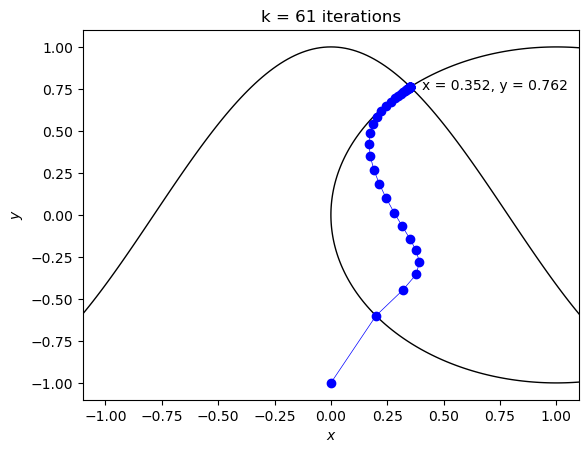

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

def vector_norm(X,Y):
    return np.sqrt(((X-1)**2 + Y**2 - 1)**2 + (np.cos(2*X) - Y)**2)
    
def system(x,y):
    F = np.zeros((2,1))
    F[0] = ((x-1)**2 + y**2 - 1)
    F[1] = (np.cos(2*x) - y)
    return F


def Jacobian(x,y):
    '''
    Computes the Jacobian of the system of equations
    '''
    J = np.zeros((2,2), dtype=np.float64)
    J[0,0] = -2*x - 2
    J[0,1] = 2*y
    J[1,0] = -2*np.sin(2*x)
    J[1,1] = -1
    return J

def GradientDescent(x0,y0,delta,tol,maxit):
    """
    Gradient Descent Method with line search. Author: James Baxter Chapman

    Parameters
    ----------
    x0 
    """

    # Initial states
    x = np.array(([x0],[y0]))
    x_values = []
    iter = []
    print('x = ' + str([x0]) + ', y = ' + str([y0]) + ', k = 0')
    k = 0
    
    while vector_norm(x[0],x[1]) > tol and (k < maxit):
        d = -2 * np.transpose(Jacobian(x[0],x[1])) @ system(x[0],x[1])  
        x1 = x + delta*d
        x = x1.copy()
        k += 1
        print('x = ' + str(x[0]) + ', y = ' + str(x[1]) + ', k = ' + str(k) + ', lambda = ' + str(delta) + ', tol = ' + str(vector_norm(x[0], x[1])))
  
                
        x_values.append(x) 
        iter.append(k)
    return x_values, iter


x0 = 0
y0 = -1
x_values, iter = GradientDescent(x0,y0,0.05,1e-6,200)

xvalues = np.reshape(x_values, (len(x_values),2))

xval = xvalues[:,0]
yval = xvalues[:,1]

xval = np.concatenate((np.array([x0]), xval))
yval = np.concatenate((np.array([y0]), yval))


F1 = (x1 - 1)**2 + x2**2 - 1
F2 = np.cos(2*x1) - x2

D = plt.contour(x1, x2, F1, colors='black', levels=[0], linewidths = 1)
E = plt.contour(x1,x2, F2, colors='black', levels=[0], linewidths = 1)
plt.plot(xval, yval, '-o', color='blue', lw=0.5)
plt.xlim(-1.1,1.1)
plt.ylim(-1.1,1.1)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.text((xval[-1] + 0.05), (yval[-1] - 0.02), 'x = ' + (str((round(xval[-1], 3))) + ', y = ' + str((round(yval[-1],3)))))
plt.title('k = ' + str(iter[-1]) + ' iterations')


x = [0], y = [-1], k = 0
x = [0.2], y = [-0.6], k = 1, lambda = 0.05, gamma = 0.1, tol = [1.52106099]
x = [0.33846581], y = [-0.4078939], k = 2, lambda = 0.05, gamma = 0.1, tol = [1.25168393]
x = [0.39506472], y = [-0.30224885], k = 3, lambda = 0.05, gamma = 0.1, tol = [1.14304969]
x = [0.3922463], y = [-0.22389015], k = 4, lambda = 0.05, gamma = 0.1, tol = [1.09769655]
x = [0.36195626], y = [-0.14888462], k = 5, lambda = 0.05, gamma = 0.1, tol = [1.06410945]
x = [0.32243117], y = [-0.06856828], k = 6, lambda = 0.05, gamma = 0.1, tol = [1.02004935]
x = [0.28098043], y = [0.01888519], k = 7, lambda = 0.05, gamma = 0.1, tol = [0.95782283]
x = [0.24134887], y = [0.11218621], k = 8, lambda = 0.05, gamma = 0.1, tol = [0.87637067]
x = [0.20694535], y = [0.20811334], k = 9, lambda = 0.05, gamma = 0.1, tol = [0.77968402]
x = [0.18129262], y = [0.30209299], k = 10, lambda = 0.05, gamma = 0.1, tol = [0.6763224]
x = [0.16728588], y = [0.38918725], k = 11, lambda = 0.05, gamma = 0.1, tol = [0.5766

<>:61: SyntaxWarning: invalid escape sequence '\g'
<>:62: SyntaxWarning: invalid escape sequence '\g'
<>:63: SyntaxWarning: invalid escape sequence '\g'
<>:61: SyntaxWarning: invalid escape sequence '\g'
<>:62: SyntaxWarning: invalid escape sequence '\g'
<>:63: SyntaxWarning: invalid escape sequence '\g'
/var/folders/53/rgjxmmln1nsd358smgzc_x8m0000gn/T/ipykernel_22845/2309572498.py:61: SyntaxWarning: invalid escape sequence '\g'
  plt.plot(xval_0_1, yval_0_1, '-o', color='blue', lw=1, label='$\gamma = 0.1$')
/var/folders/53/rgjxmmln1nsd358smgzc_x8m0000gn/T/ipykernel_22845/2309572498.py:62: SyntaxWarning: invalid escape sequence '\g'
  plt.plot(xval_0_3, yval_0_3, '-o', color='green', lw=1, label='$\gamma = 0.3$')
/var/folders/53/rgjxmmln1nsd358smgzc_x8m0000gn/T/ipykernel_22845/2309572498.py:63: SyntaxWarning: invalid escape sequence '\g'
  plt.plot(xval_0_7, yval_0_7, '-o', color='red', lw=1, label='$\gamma = 0.7$')
/var/folders/53/rgjxmmln1nsd358smgzc_x8m0000gn/T/ipykernel_22845/11503

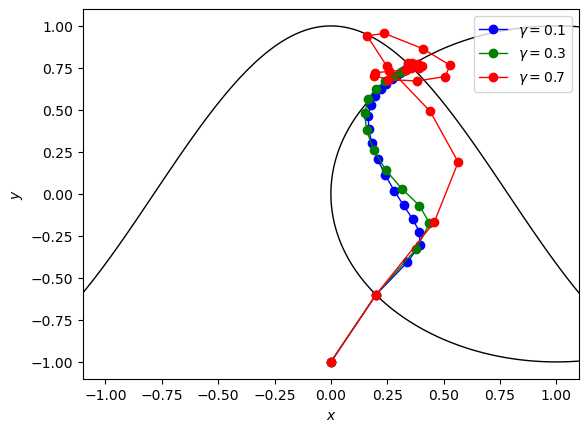

In [332]:
def MomentumGradientDescent(x0,y0,delta,gamma,tol,maxit):
    """
    Gradient Descent Method without line search. Author: James Baxter Chapman

    Parameters
    ----------
    x0 
    """

    # Initial states
    x = np.array(([x0],[y0]))
    x_values = []
    iter = []
    print('x = ' + str([x0]) + ', y = ' + str([y0]) + ', k = 0')
    k = 0
    d_last = 0
    while vector_norm(x[0],x[1]) > tol and (k < maxit):
        d = gamma*d_last + 2 * np.transpose(Jacobian(x[0],x[1])) @ system(x[0],x[1])  
        x1 = x - delta*d
        x = x1.copy()
        d_last = d.copy()
        k += 1
        print('x = ' + str(x[0]) + ', y = ' + str(x[1]) + ', k = ' + str(k) + ', lambda = ' + str(delta) +  ', gamma = ' + str(gamma) + ', tol = ' + str(vector_norm(x[0], x[1])))
  
                
        x_values.append(x) 
        iter.append(k)
    return x_values, iter

x0 = 0
y0 = -1
x_values_0_1, iter_0_1= MomentumGradientDescent(x0,y0,0.05,0.1,1e-6,200)
x_values_0_3, iter_0_3= MomentumGradientDescent(x0,y0,0.05,0.3,1e-6,200)
x_values_0_7, iter_0_7= MomentumGradientDescent(x0,y0,0.05,0.7,1e-6,200)


F1 = (x1 - 1)**2 + x2**2 - 1
F2 = np.cos(2*x1) - x2

D = plt.contour(x1, x2, F1, colors='black', levels=[0], linewidths = 1)
E = plt.contour(x1,x2, F2, colors='black', levels=[0], linewidths = 1)

x_values_0_1 = np.reshape(x_values_0_1, (len(x_values_0_1),2))
x_values_0_3 = np.reshape(x_values_0_3, (len(x_values_0_3),2))
x_values_0_7 = np.reshape(x_values_0_7, (len(x_values_0_7),2))

xval_0_1 = x_values_0_1[:,0]
xval_0_3 = x_values_0_3[:,0]
xval_0_7 = x_values_0_7[:,0]
yval_0_1 = x_values_0_1[:,1]
yval_0_3 = x_values_0_3[:,1]
yval_0_7 = x_values_0_7[:,1]

xval_0_1 = np.concatenate((np.array([x0]), xval_0_1))
xval_0_3 = np.concatenate((np.array([x0]), xval_0_3))
xval_0_7 = np.concatenate((np.array([x0]), xval_0_7))
yval_0_1 = np.concatenate((np.array([y0]), yval_0_1))
yval_0_3 = np.concatenate((np.array([y0]), yval_0_3))
yval_0_7 = np.concatenate((np.array([y0]), yval_0_7))

plt.plot(xval_0_1, yval_0_1, '-o', color='blue', lw=1, label='$\gamma = 0.1$')
plt.plot(xval_0_3, yval_0_3, '-o', color='green', lw=1, label='$\gamma = 0.3$')
plt.plot(xval_0_7, yval_0_7, '-o', color='red', lw=1, label='$\gamma = 0.7$')

plt.xlim(-1.1,1.1)
plt.ylim(-1.1,1.1)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()

